<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Visualizing a Quantum State*_ 

For more information about how to use the IBM Q experience (QX), consult the [tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Jay Gambetta, Andrew Cross

In [1]:
# Checking the version of PYTHON; we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la

import sys
sys.path.append("../../")
# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.basicplotter import plot_histogram

In [2]:
# import state tomography functions
from tools.tomography import plot_state

### The outcomes of a quantum circuit 

In quantum you can not measure a state without disturbing it. The act of measurement changes the state. After performing a quantum measurement, a qubit's information becomes a classical bit, and in our system (as is standard) the measurements are performed in the computational basis. For each qubit the measurement either takes the value 0 if the qubit is measured in state $|0\rangle$ and value 1 if the qubit is measured in state $|1\rangle$. 

In a given run of a quantum circuit with measurements, the result will be one of the  possible n-bit binary strings. If the experiment is run a second time, even if the measurement is perfect and has no error, the outcome may be different due to the fundamental randomness of quantum physics. The results of a quantum circuit executed many different times can be represented as a distribution over the full possible outcomes. For a quantum circuit which has previously ran on a backend with name "circuit" this histogram can be obtained using provided you have inported the basicplotter.

```
plot_histogram(Q_program.get_counts("circuit"),number)
```

The histogram/bar graph is simple to understand. The height of the bar represents the fraction of instances the outcome comes up in the different runs on the backend. Only those outcomes that occurred with non-zero occurrences are included. If number=n is set only the largerst n bars are shown. The rest of the bars are collected into single bar called rest. In general this is not a problem as a good quantum circuit should not have many outcomes only circuits that have the final state in a large superposition will give many outcomes and these would take exponential measurements to measure. 

In [3]:
# Build the quantum cirucit. We are going to build two circuits a GHZ over 5 qubits and a
# superpositon over all 5 qubits 
Q_program = QuantumProgram()
n = 3  # number of qubits 
q = Q_program.create_quantum_registers("q", n)
c = Q_program.create_classical_registers("c", n)

# quantum circuit to make an entangled bell state 
ghz = Q_program.create_circuit("ghz", ["q"], ["c"])
ghz.h(q[0])
ghz.cx(q[0], q[1])
ghz.cx(q[0], q[2])
ghz.s(q[0])
ghz.measure(q[0], c[0])
ghz.measure(q[1], c[1])
ghz.measure(q[2], c[2])

# quantum circuit to make an entangled bell state 
superposition = Q_program.create_circuit("superposition", ["q"], ["c"])
superposition.h(q)
superposition.s(q[0])
superposition.measure(q[0], c[0])
superposition.measure(q[1], c[1])
superposition.measure(q[2], c[2])


circuits = ["ghz", "superposition"]

# execute the quantum circuit 
backend = 'local_qasm_simulator' # the device to run on
Q_program.execute(circuits, backend, 1000, silent = True )

>> quantum_registers created: q 3
>> classical_registers created: c 3


{'result': 'all done', 'status': 'COMPLETED'}

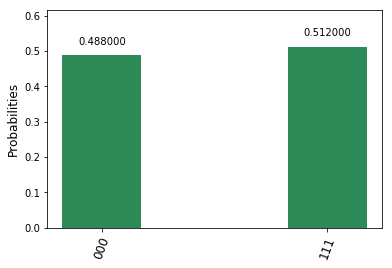

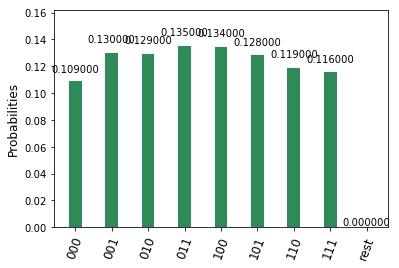

In [4]:
plot_histogram(Q_program.get_counts("ghz"))
plot_histogram(Q_program.get_counts("superposition"),15)

### Method for visualizing a quantum state

For educational and debugging purposes it is useful to visualize a quantum state, $\rho$. Experimentally to reconstruct a quantum state we have to perform $4^n$ different experiments, where n is the number of qubits and combined them 
using a process known as [quantum state tomography](state_tomography.ipynb) to estimate the quantum state.

#### pure states

A pure state $|\psi\rangle$ is an element of $\mathcal{H}$, where $\mathcal{H}$ is known as a Hilbert space. For n-qubits the Hilbert space consists of a complex vector space $\mathbb{C}^{d}$ of dimensions $d=2^n$ and we denote the inner product by $\langle \phi | \psi \rangle$. The basis vectors of this space we denote as $|i\rangle$ where $i\in {0,...,d-1}$ and  $\langle j | i \rangle =\delta_{i,j}$ (orthonormal). This allows us to define an arbitrary pure state, or state vector, or ket as

$$|\psi\rangle = \sum_{i=0}^{d-1}\psi_i |i\rangle,$$

where $\psi_i$ is a complex number. The dual vector, or bra, is defined as

$$\langle\psi| = \sum_{i=0}^{d-1}\psi_i^* \langle i|$$

and the inner product becomes

$$\langle \phi | \psi \rangle  = \sum_{i=0}^{d-1} \phi^*_i \psi_i.$$

We require the state vector to be normalized $\langle \psi | \psi \rangle = \sum_{i=0}^{d-1} |\psi_i|^2 =1$ resulting  in there being $(d - 1)$ complex numbers to describe and arbitary state.

#### operators

In order to relate the state to quantities of physical interest we need to introduce operators. An operator is an object which maps a Hilbert space into itself, and so can be written in Dirac notation as

$$A = \sum_{i,j} a_{i,j} |i\rangle \langle j|$$ 

where $a_{ij}$ are complex numbers. The mean or expectation value of $A$ is written as 

$$\langle A \rangle  = \langle \psi |A |\psi\rangle. $$ 


#### mixed states

Consider a statistical mixture of observables 
$$\langle A \rangle  = \sum_k P_k \langle \psi_k |A |\psi_k\rangle = \mathrm{Tr}[A \rho ], $$

where 

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k | = \sum_{i,j}\rho_{i,j} |i\rangle\langle j |.$$

$\rho$ is the most general type of quantum state known as a mixed state or state operator. A quantum state operator must obey the following three constraints
1. Normalized, $Tr[\rho] = 1$.
2. Hermitian, $\rho^\dagger = \rho$.
3. positive semi-definite $\rho \geq 0$

The real and imaginary matrix elements $\rho_{i,j}$ represent the standard representation of a quantum state and we have provided the following fucntion to plot it

```
plot_state(rho, method="city")
```
which makes two 2-dimensional bargraphs (real and imaginary part) where the diagonal is real and sums to 1 and $\rho_{i,j} =\rho_{j,i}^*$.

We can view operators as a vector in complex space of dimensions $d^2$ ($\mathbb{C}^{d^2}$) and to access the element $a_{ij}$ we use $a_p$ where $p = i + jd$, and if we wanted to know the $i$ and $j$ associtated with a given $p$ then we would use $i = p \% d$ and $j = \mathrm{floor}(p/d)$. We will use this double ket notation to represent the vector form of the matrix A. In this new space we can define the inner product in the standard way

$$\langle\langle A | B\rangle\rangle = \sum_{p=0}^{d^2-1}a^*_pb_p=\sum_{i,j=0}^{d-1} a_{ij}^* b_{ij}=\mathrm{Tr}[A^\dagger B]$$

Appling this to $\rho$ we get

$$| \rho \rangle \rangle  = \sum_{p=0}^{d^2-1} \rho_p |p\rangle\rangle  $$  

where some of the basis states in $\{|p\rangle\rangle \}$ represent operators that are not measurable. The pauli basis which consists of $4^n$ operators formed by the tensor product of pauli operators ${I,X,Y,Z}$ gives a basis which has only real coefficents $p_p$

$$| \rho \rangle \rangle  = \frac{1}{d}\sum_{q=0}^{d^2-1} p_q |P_q\rangle\rangle.  $$

To plot a bar graph of these coefficents we have provided the method 
```
plot_state(rho, method="paulivec")
```

Lastly we provide the method 

```
plot_state(rho, method="qsphere")
```
which plots the qspheres of the quantum state. For any hermitian operator we can diagonalize $\rho$ as  

$$\rho = \sum_k \lambda_k |\lambda_k\rangle\langle \lambda_k |$$

where for each eigenvalue $\lambda_k$ the pure state $|\lambda_k\rangle$ is plotted on a qsphere. The QSphere is divided into $n+1$ levels, and each section represents the weight (total number of 1s) of the binary outcome. The top is the $|0...0\rangle$ state, the next line is all the states with a single 1 ($|1...0\rangle$,$|0...1\rangle$ , etc), the line after that is all states with two 1s, and so on until the bottom is the state $|1...1\rangle$. The contrast of each line is the $|\langle i|\lambda\rangle|$ and the color represents the phase $angle(\langle i|\lambda\rangle)$ with the global phase normalized to the max amplitude.

The usefulness of this representation is it is more compact for quantum states that are close to pure states. 

In [5]:
# execute the quantum circuit 
backend = 'local_unitary_simulator' # the device to run on
Q_program.execute(circuits, backend, 1000, silent = True )

ground = np.zeros(2**n)
ground[0]=1.0

state_superposition = np.dot(Q_program.get_data("superposition")['unitary'],ground)
rho_superposition=np.outer(state_superposition, state_superposition.conj())

state_bell = np.dot(Q_program.get_data("ghz")['unitary'],ground)
rho_bell=np.outer(state_bell, state_bell.conj())


Warning have dropped measure from unitary simulator
Warning have dropped measure from unitary simulator
Warning have dropped measure from unitary simulator
Warning have dropped measure from unitary simulator
Warning have dropped measure from unitary simulator
Warning have dropped measure from unitary simulator


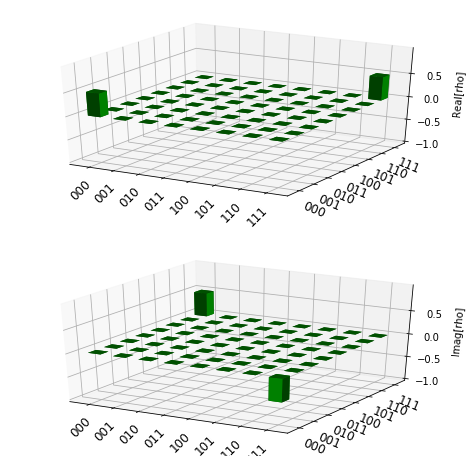

In [6]:
plot_state(rho_bell,"city")

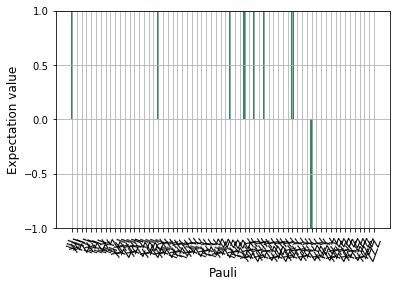

In [7]:
plot_state(rho_bell,"paulivec")

The 0th eigenvalue = 1.0


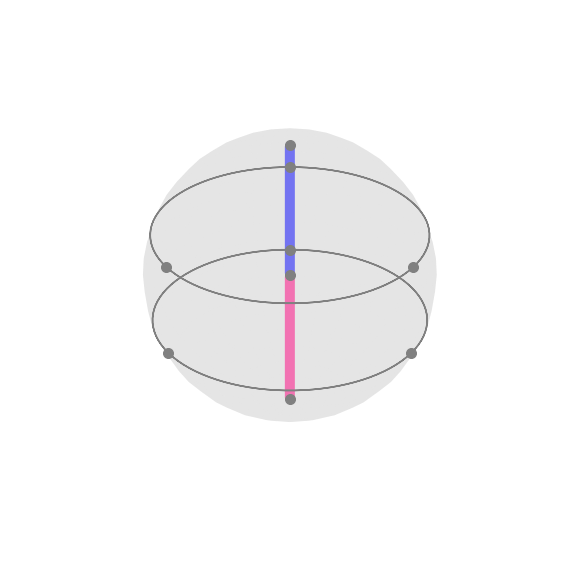

In [8]:
plot_state(rho_bell,"qsphere")

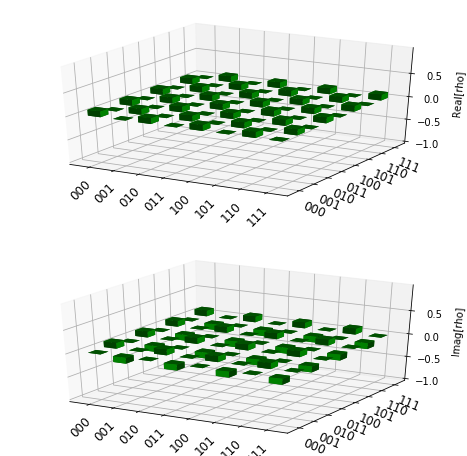

In [9]:
plot_state(rho_superposition,"city")

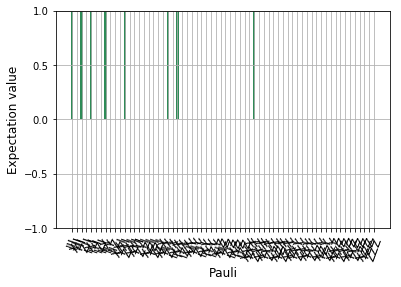

In [10]:
plot_state(rho_superposition,"paulivec")

The 0th eigenvalue = 1.0


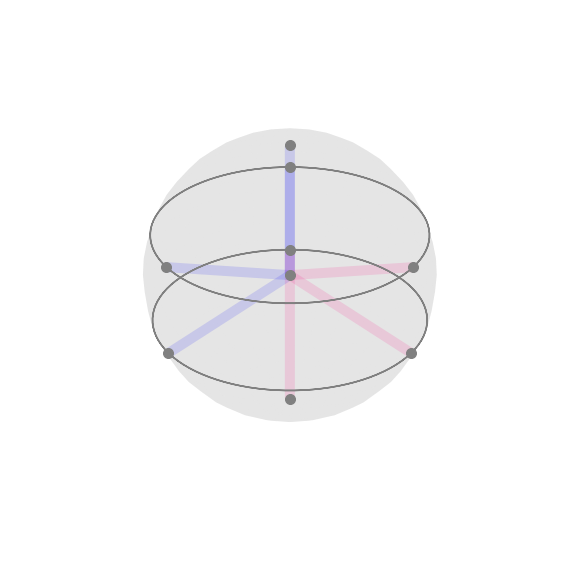

In [11]:
plot_state(rho_superposition,"qsphere")

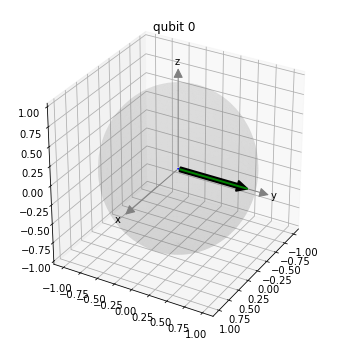

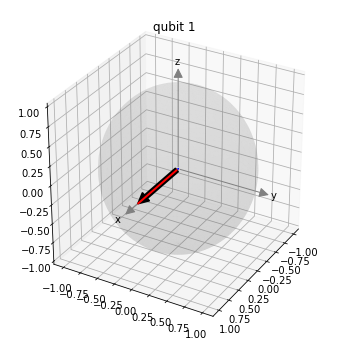

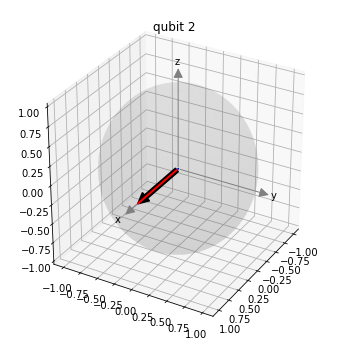

In [12]:
plot_state(rho_superposition,"bloch")